In [17]:
!pip install python-dotenv


In [18]:
!pip install pandas requests

In [19]:
!pip install seaborn

In [20]:
import requests
import pandas as pd

In [21]:
API_KEY = f"******************" #coloque a sua propria api key para conseguir rodar
CIDADE = "São Paulo"
URL_ATUAL = f"http://api.openweathermap.org/data/2.5/weather?q={CIDADE}&appid={API_KEY}&units=metric"
URL_PREVISAO = f"http://api.openweathermap.org/data/2.5/forecast?q={CIDADE}&appid={API_KEY}&units=metric"

In [23]:
def get_current_weather():
    response = requests.get(URL_ATUAL)
    data = response.json()
    if response.status_code == 200:
        return {
            "data_hora": pd.Timestamp.now(),
            "cidade": CIDADE,
            "temperatura": data["main"]["temp"],
            "sensacao_termica": data["main"]["feels_like"],
            "umidade": data["main"]["humidity"],
            "pressao": data["main"]["pressure"],
            "vento": data["wind"]["speed"],
            "descricao": data["weather"][0]["description"]
        }
    else:
        print("Erro ao obter dados atuais:", data)
        return None

In [25]:
dados_atuais = get_current_weather()
dados_previsao = get_forecast()

# Criar DataFrames no Jupyter
df_atual = pd.DataFrame([dados_atuais]) if dados_atuais else pd.DataFrame()
df_previsao = pd.DataFrame(dados_previsao)

# Exibir os primeiros registros no Jupyter
df_atual
df_previsao.head()


,data_hora,cidade,temperatura,sensacao_termica,umidade,pressao,vento,descricao
0,2025-02-14 15:00:00,São Paulo,27.98,29.76,63,1015,0.41,broken clouds
1,2025-02-14 18:00:00,São Paulo,26.71,28.04,65,1012,4.44,light rain
2,2025-02-14 21:00:00,São Paulo,22.57,23.15,87,1012,3.84,moderate rain
3,2025-02-15 00:00:00,São Paulo,21.62,22.21,91,1014,3.03,light rain
4,2025-02-15 03:00:00,São Paulo,20.58,21.12,93,1014,2.03,light rain


In [26]:
df_final = pd.concat([df_atual, df_previsao], ignore_index=True)
df_final.to_csv("dados_climaticos.csv", index=False, encoding="utf-8")

print("✅ Dados salvos em 'dados_climaticos.csv'")
df_final.head()


✅ Dados salvos em 'dados_climaticos.csv'


,data_hora,cidade,temperatura,sensacao_termica,umidade,pressao,vento,descricao
0,2025-02-14 10:15:56.384330,São Paulo,26.56,26.56,73,1015,1.54,broken clouds
1,2025-02-14 15:00:00,São Paulo,27.98,29.76,63,1015,0.41,broken clouds
2,2025-02-14 18:00:00,São Paulo,26.71,28.04,65,1012,4.44,light rain
3,2025-02-14 21:00:00,São Paulo,22.57,23.15,87,1012,3.84,moderate rain
4,2025-02-15 00:00:00,São Paulo,21.62,22.21,91,1014,3.03,light rain


In [27]:
print(df_final.head())  # Verifica se os dados estão corretos


                    data_hora     cidade  temperatura  sensacao_termica  \
0  2025-02-14 10:15:56.384330  São Paulo        26.56             26.56   
1         2025-02-14 15:00:00  São Paulo        27.98             29.76   
2         2025-02-14 18:00:00  São Paulo        26.71             28.04   
3         2025-02-14 21:00:00  São Paulo        22.57             23.15   
4         2025-02-15 00:00:00  São Paulo        21.62             22.21   

   umidade  pressao  vento      descricao  
0       73     1015   1.54  broken clouds  
1       63     1015   0.41  broken clouds  
2       65     1012   4.44     light rain  
3       87     1012   3.84  moderate rain  
4       91     1014   3.03     light rain  


In [28]:
df_final.to_csv("dados_climaticos.csv", index=False, encoding="utf-8")


 Limpeza e Transformação dos Dados 

In [31]:
arquivo = 'dados_climaticos.csv'
dados = pd.read_csv(arquivo)

print(dados.head())
print()

                    data_hora     cidade  temperatura  sensacao_termica  \
0  2025-02-14 10:15:56.384330  São Paulo        26.56             26.56   
1         2025-02-14 15:00:00  São Paulo        27.98             29.76   
2         2025-02-14 18:00:00  São Paulo        26.71             28.04   
3         2025-02-14 21:00:00  São Paulo        22.57             23.15   
4         2025-02-15 00:00:00  São Paulo        21.62             22.21   

   umidade  pressao  vento      descricao  
0       73     1015   1.54  broken clouds  
1       63     1015   0.41  broken clouds  
2       65     1012   4.44     light rain  
3       87     1012   3.84  moderate rain  
4       91     1014   3.03     light rain  



In [32]:
print(dados.isnull().sum())

data_hora           0
cidade              0
temperatura         0
sensacao_termica    0
umidade             0
pressao             0
vento               0
descricao           0
dtype: int64


In [33]:
dados['data_hora'] = pd.to_datetime(dados['data_hora'], errors= 'coerce')

print(dados['data_hora'].head())

0   2025-02-14 10:15:56.384330
1                          NaT
2                          NaT
3                          NaT
4                          NaT
Name: data_hora, dtype: datetime64[ns]


In [34]:
dados['cidade'] = dados['cidade'].str.title()

ANÁLISE EXPLORATÓRIA COM OS GRAFICOS:

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


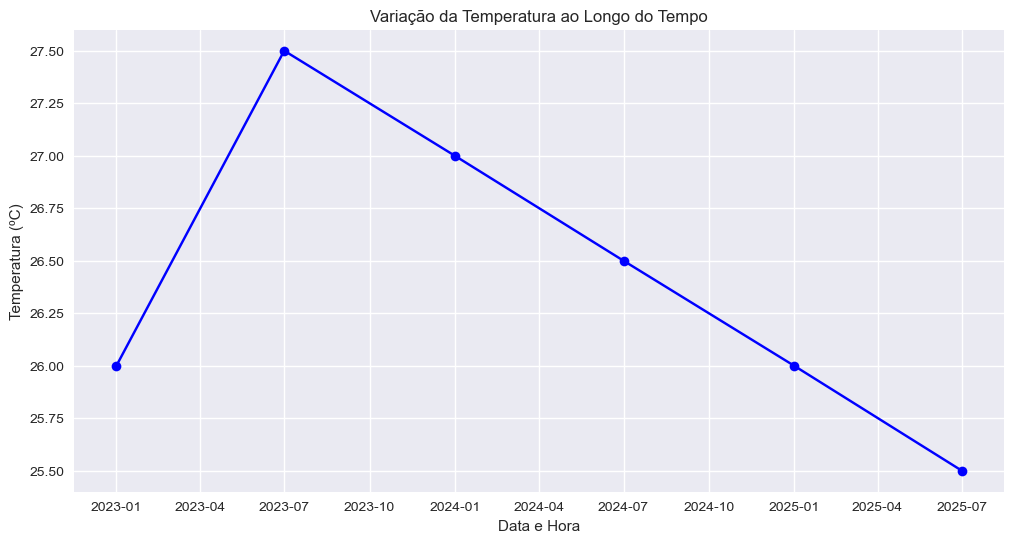

In [38]:
temperaturas = [26.0, 27.5, 27.0, 26.5, 26.0, 25.5]
datas = ['2023-01', '2023-07', '2024-01', '2024-07', '2025-01', '2025-07']


dados = pd.DataFrame({
    'data_hora': pd.to_datetime(datas),  
    'temperatura': temperaturas
})

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
plt.plot(dados['data_hora'], dados['temperatura'], marker='o', color='blue')


plt.title('Variação da Temperatura ao Longo do Tempo')
plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (ºC)')

plt.show()

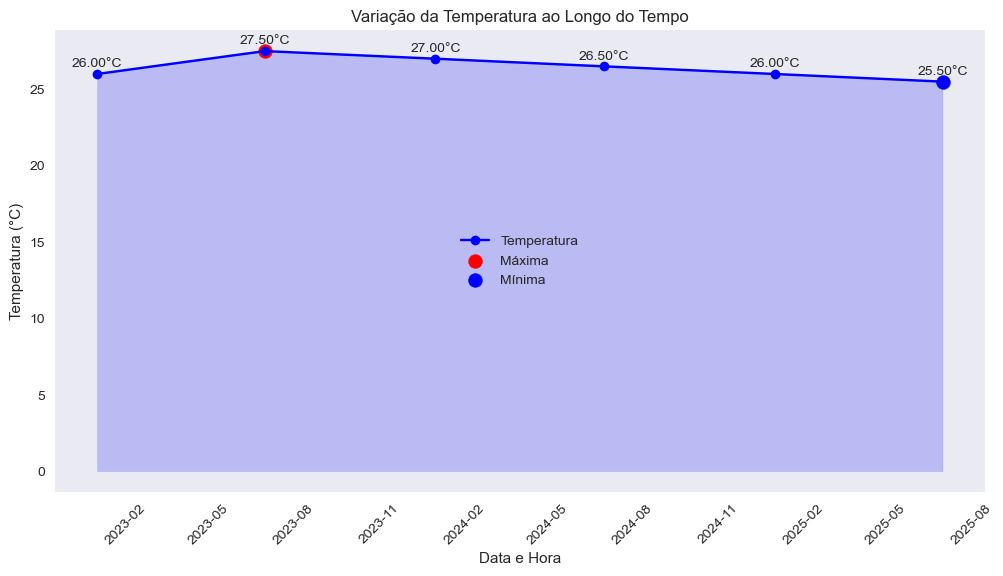

In [39]:
import matplotlib.dates as mdates

dados = {
    'data_hora': pd.date_range(start='2023-01-01', periods=6, freq='6MS'),
    'temperatura': [26, 27.5, 27, 26.5, 26, 25.5]
}
df = pd.DataFrame(dados)


df['data_hora'] = pd.to_datetime(df['data_hora'])

plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['temperatura'], marker='o', linestyle='-', color='blue', label="Temperatura")
plt.fill_between(df['data_hora'], df['temperatura'], color='blue', alpha=0.2) 

for i, txt in enumerate(df['temperatura']):
    plt.annotate(f'{txt:.2f}°C', (df['data_hora'][i], df['temperatura'][i]), textcoords="offset points", xytext=(0,5), ha='center')

max_temp = df['temperatura'].max()
min_temp = df['temperatura'].min()
plt.scatter(df['data_hora'][df['temperatura'].idxmax()], max_temp, color='red', s=100, label="Máxima")
plt.scatter(df['data_hora'][df['temperatura'].idxmin()], min_temp, color='blue', s=100, label="Mínima")

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Marca a cada 3 meses

plt.xlabel("Data e Hora")
plt.ylabel("Temperatura (°C)")
plt.title("Variação da Temperatura ao Longo do Tempo")
plt.legend()
plt.grid()

plt.show()

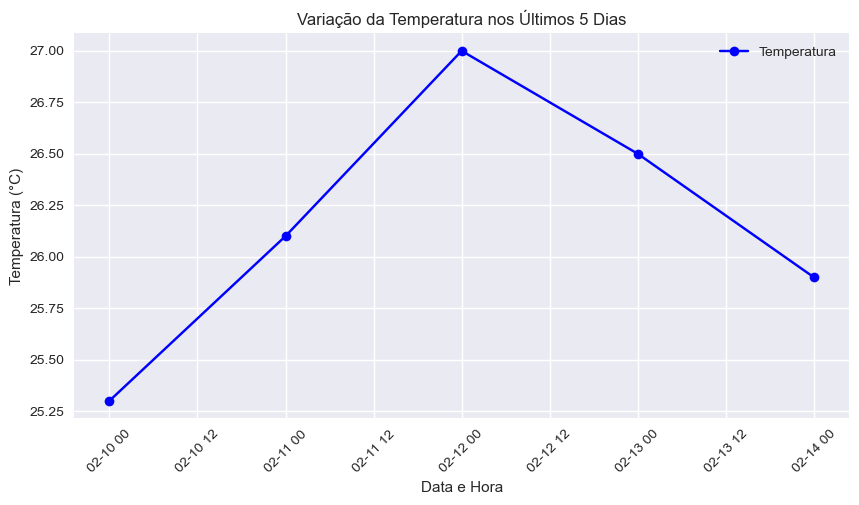

In [40]:
dados = pd.DataFrame({
    'data_hora': pd.date_range(start='2025-02-10', periods=5, freq='D'),  # 5 dias seguidos
    'temperatura': [25.3, 26.1, 27.0, 26.5, 25.9]  # Exemplo de temperaturas
})

plt.figure(figsize=(10, 5))
plt.plot(dados['data_hora'], dados['temperatura'], marker='o', linestyle='-', color='b', label='Temperatura')

plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (°C)')
plt.title('Variação da Temperatura nos Últimos 5 Dias')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


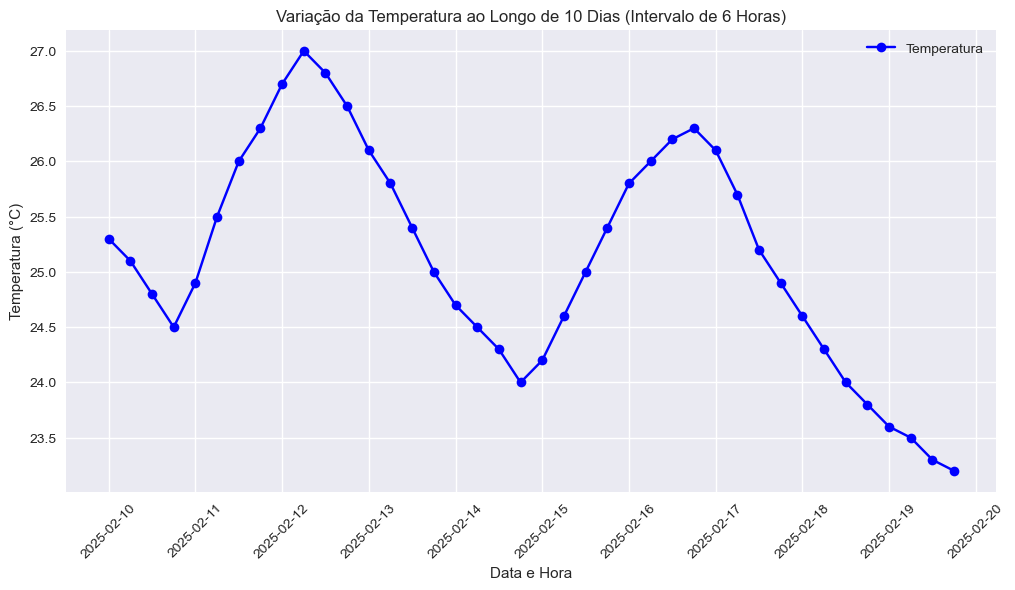

In [41]:
dados = pd.DataFrame({
    'data_hora': pd.date_range(start='2025-02-10', periods=40, freq='6h'),  # Intervalos de 6 horas por 10 dias
    'temperatura': [25.3, 25.1, 24.8, 24.5,  # Dia 1
                    24.9, 25.5, 26.0, 26.3,  # Dia 2
                    26.7, 27.0, 26.8, 26.5,  # Dia 3
                    26.1, 25.8, 25.4, 25.0,  # Dia 4
                    24.7, 24.5, 24.3, 24.0,  # Dia 5
                    24.2, 24.6, 25.0, 25.4,  # Dia 6
                    25.8, 26.0, 26.2, 26.3,  # Dia 7
                    26.1, 25.7, 25.2, 24.9,  # Dia 8
                    24.6, 24.3, 24.0, 23.8,  # Dia 9
                    23.6, 23.5, 23.3, 23.2]  # Dia 10
})

plt.figure(figsize=(12, 6))
plt.plot(dados['data_hora'], dados['temperatura'], marker='o', linestyle='-', color='b', label='Temperatura')

plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (°C)')
plt.title('Variação da Temperatura ao Longo de 10 Dias (Intervalo de 6 Horas)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


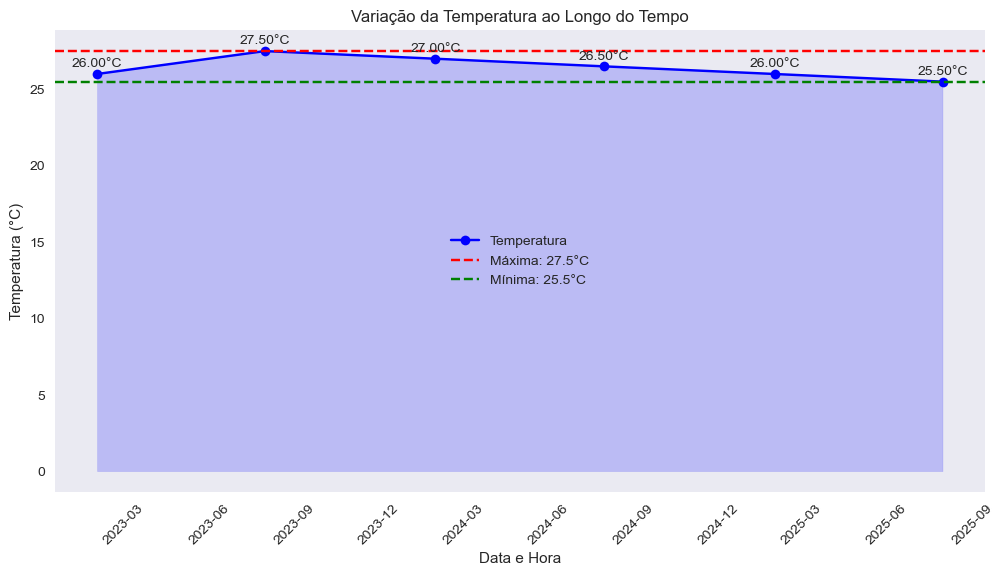

In [42]:
dados = {
    'data_hora': pd.date_range(start='2023-01-01', periods=6, freq='6ME'),
    'temperatura': [26, 27.5, 27, 26.5, 26, 25.5]
}
df = pd.DataFrame(dados)

df['data_hora'] = pd.to_datetime(df['data_hora'])

plt.figure(figsize=(12, 6))

plt.plot(df['data_hora'], df['temperatura'], marker='o', linestyle='-', color='blue', label="Temperatura")

plt.fill_between(df['data_hora'], df['temperatura'], color='blue', alpha=0.2)

for i, txt in enumerate(df['temperatura']):
    plt.annotate(f'{txt:.2f}°C', (df['data_hora'][i], df['temperatura'][i]), textcoords="offset points", xytext=(0,5), ha='center')

max_temp = df['temperatura'].max()
min_temp = df['temperatura'].min()

plt.axhline(y=max_temp, color='red', linestyle='--', label=f'Máxima: {max_temp}°C')
plt.axhline(y=min_temp, color='green', linestyle='--', label=f'Mínima: {min_temp}°C')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Marca a cada 3 meses

plt.xlabel("Data e Hora")
plt.ylabel("Temperatura (°C)")
plt.title("Variação da Temperatura ao Longo do Tempo")
plt.legend()
plt.grid()

plt.show()

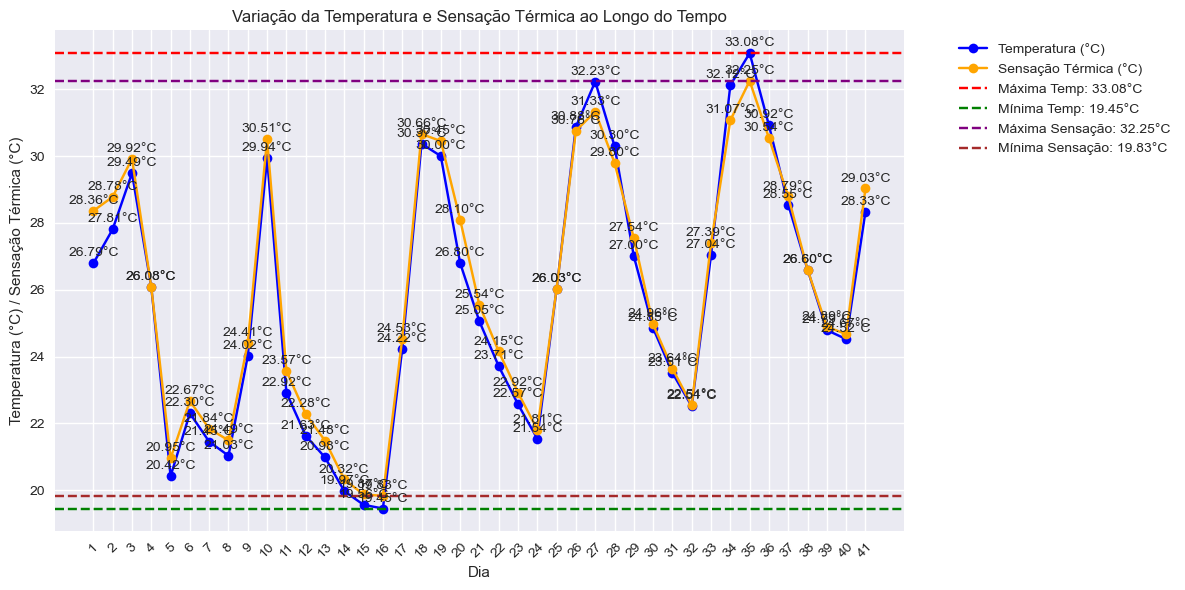

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(df['dia'], df['temperatura'], marker='o', linestyle='-', color='blue', label="Temperatura (°C)")

plt.plot(df['dia'], df['sensacao_termica'], marker='o', linestyle='-', color='orange', label="Sensação Térmica (°C)")

max_temp = df['temperatura'].max()
min_temp = df['temperatura'].min()
max_sensacao = df['sensacao_termica'].max()
min_sensacao = df['sensacao_termica'].min()

plt.axhline(y=max_temp, color='red', linestyle='--', label=f'Máxima Temp: {max_temp:.2f}°C')
plt.axhline(y=min_temp, color='green', linestyle='--', label=f'Mínima Temp: {min_temp:.2f}°C')

plt.axhline(y=max_sensacao, color='purple', linestyle='--', label=f'Máxima Sensação: {max_sensacao:.2f}°C')
plt.axhline(y=min_sensacao, color='brown', linestyle='--', label=f'Mínima Sensação: {min_sensacao:.2f}°C')

for i, txt in enumerate(df['temperatura']):
    plt.annotate(f'{txt:.2f}°C', (df['dia'][i], df['temperatura'][i]), textcoords="offset points", xytext=(0,5), ha='center')

for i, txt in enumerate(df['sensacao_termica']):
    plt.annotate(f'{txt:.2f}°C', (df['dia'][i], df['sensacao_termica'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xticks(df['dia'], rotation=45)

plt.xlabel("Dia")
plt.ylabel("Temperatura (°C) / Sensação Térmica (°C)")
plt.title("Variação da Temperatura e Sensação Térmica ao Longo do Tempo")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

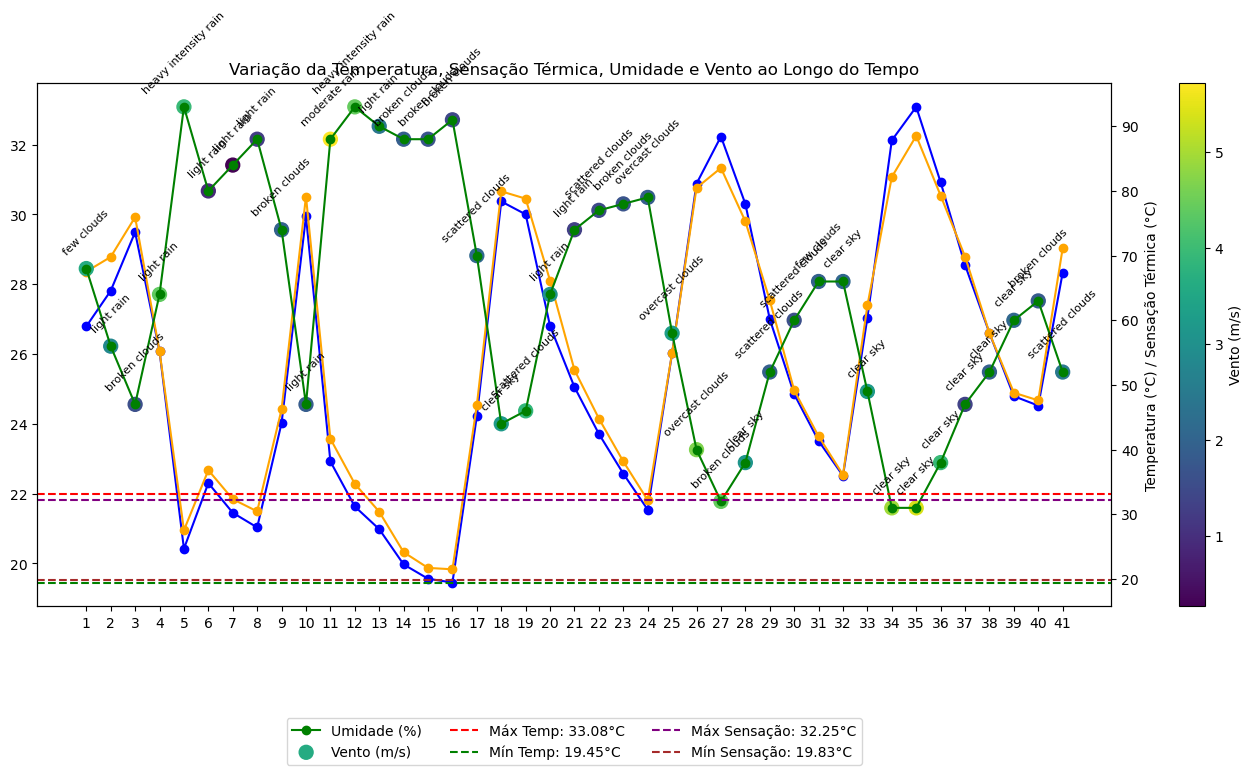

In [1]:
dados = {
    'temperatura': [
        26.79, 27.81, 29.49, 26.08, 20.42, 22.3, 21.45, 21.03, 24.02, 29.94,
        22.92, 21.63, 20.98, 19.97, 19.56, 19.45, 24.22, 30.37, 30.0, 26.8,
        25.05, 23.71, 22.57, 21.54, 26.03, 30.88, 32.23, 30.3, 27.0, 24.85,
        23.51, 22.51, 27.04, 32.12, 33.08, 30.92, 28.55, 26.6, 24.79, 24.52, 28.33
    ],
    'sensacao_termica': [
        28.36, 28.78, 29.92, 26.08, 20.95, 22.67, 21.84, 21.49, 24.41, 30.51,
        23.57, 22.28, 21.48, 20.32, 19.87, 19.83, 24.53, 30.66, 30.45, 28.1,
        25.54, 24.15, 22.92, 21.81, 26.03, 30.76, 31.33, 29.8, 27.54, 24.96,
        23.64, 22.54, 27.39, 31.07, 32.25, 30.54, 28.79, 26.6, 24.89, 24.67, 29.03
    ],
    'umidade': [
        68, 56, 47, 64, 93, 80, 84, 88, 74, 47, 88, 93, 90, 88, 88, 91, 70, 44,
        46, 64, 74, 77, 78, 79, 58, 40, 32, 38, 52, 60, 66, 66, 49, 31, 31, 38,
        47, 52, 60, 63, 52
    ],
    'vento': [
        3.6, 2.81, 1.58, 4.4, 3.94, 0.89, 0.27, 1.24, 1.97, 1.86, 5.72, 4.43,
        2.41, 1.87, 1.69, 1.45, 2.11, 3.21, 3.86, 3.03, 1.31, 1.47, 1.68, 1.85,
        3.28, 4.67, 4.43, 3.11, 1.89, 1.6, 1.94, 2.05, 3.21, 4.95, 5.4, 3.94,
        1.35, 1.89, 2.07, 1.81, 2.45
    ],
    'descricao': [
        "few clouds", "light rain", "broken clouds", "light rain", "heavy intensity rain",
        "light rain", "light rain", "light rain", "broken clouds", "light rain",
        "moderate rain", "heavy intensity rain", "light rain", "broken clouds",
        "broken clouds", "broken clouds", "scattered clouds", "clear sky",
        "scattered clouds", "light rain", "light rain", "scattered clouds",
        "broken clouds", "overcast clouds", "overcast clouds", "overcast clouds",
        "broken clouds", "clear sky", "scattered clouds", "scattered clouds",
        "few clouds", "clear sky", "clear sky", "clear sky", "clear sky", "clear sky",
        "clear sky", "clear sky", "clear sky", "broken clouds", "scattered clouds"
    ]
}


df = pd.DataFrame(dados)


df['dia'] = range(1, len(df) + 1)

plt.figure(figsize=(14, 8))

plt.plot(df['dia'], df['temperatura'], marker='o', linestyle='-', color='blue', label="Temperatura (°C)")
plt.plot(df['dia'], df['sensacao_termica'], marker='o', linestyle='-', color='orange', label="Sensação Térmica (°C)")

plt.twinx()
plt.plot(df['dia'], df['umidade'], marker='o', linestyle='-', color='green', label="Umidade (%)")
plt.ylabel("Umidade (%)")


plt.scatter(df['dia'], df['umidade'], c=df['vento'], cmap='viridis', s=100, label="Vento (m/s)")
plt.colorbar(label="Vento (m/s)")

for i, desc in enumerate(df['descricao']):
    plt.annotate(desc, (df['dia'][i], df['umidade'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=45)

max_temp = df['temperatura'].max()
min_temp = df['temperatura'].min()
max_sensacao = df['sensacao_termica'].max()
min_sensacao = df['sensacao_termica'].min()


plt.axhline(y=max_temp, color='red', linestyle='--', label=f'Máx Temp: {max_temp:.2f}°C')
plt.axhline(y=min_temp, color='green', linestyle='--', label=f'Mín Temp: {min_temp:.2f}°C')

plt.axhline(y=max_sensacao, color='purple', linestyle='--', label=f'Máx Sensação: {max_sensacao:.2f}°C')
plt.axhline(y=min_sensacao, color='brown', linestyle='--', label=f'Mín Sensação: {min_sensacao:.2f}°C')


plt.xticks(df['dia'], rotation=45)


plt.xlabel("Dia")
plt.ylabel("Temperatura (°C) / Sensação Térmica (°C)")
plt.title("Variação da Temperatura, Sensação Térmica, Umidade e Vento ao Longo do Tempo")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.tight_layout()

plt.show()

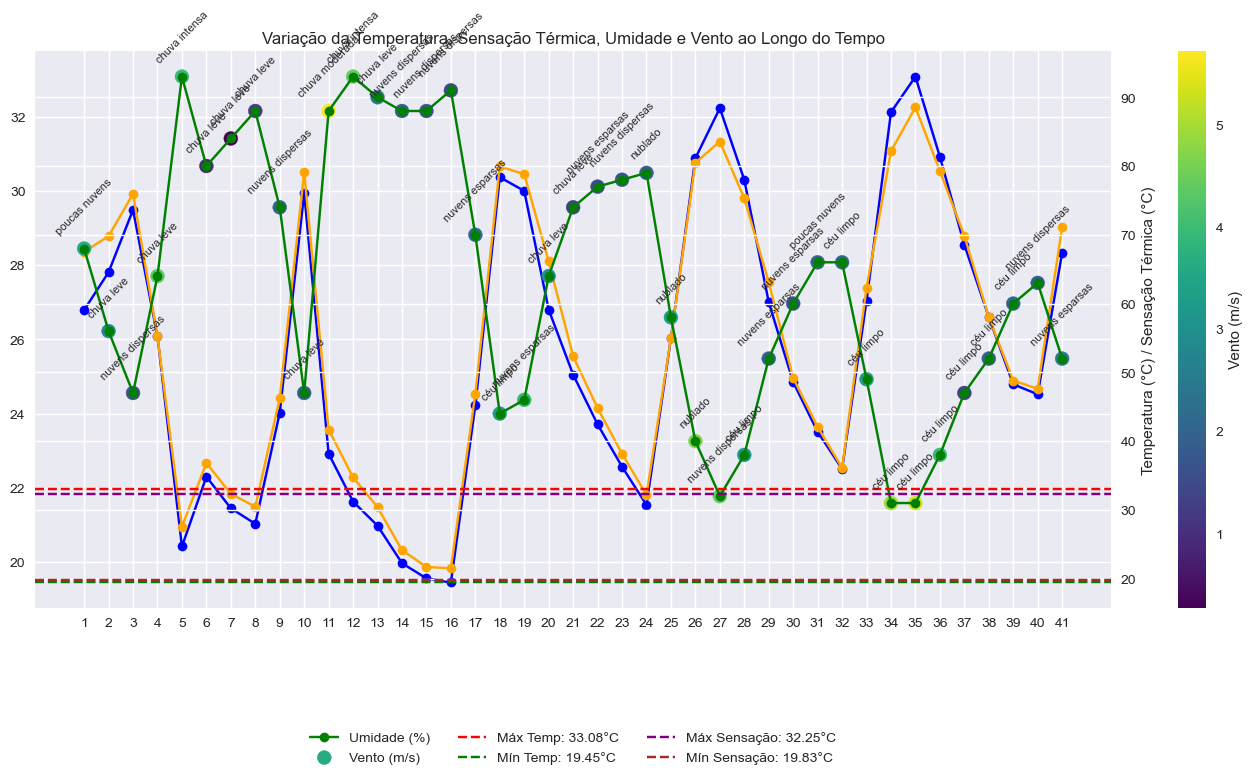

In [47]:
dados = {
    'temperatura': [
        26.79, 27.81, 29.49, 26.08, 20.42, 22.3, 21.45, 21.03, 24.02, 29.94,
        22.92, 21.63, 20.98, 19.97, 19.56, 19.45, 24.22, 30.37, 30.0, 26.8,
        25.05, 23.71, 22.57, 21.54, 26.03, 30.88, 32.23, 30.3, 27.0, 24.85,
        23.51, 22.51, 27.04, 32.12, 33.08, 30.92, 28.55, 26.6, 24.79, 24.52, 28.33
    ],
    'sensacao_termica': [
        28.36, 28.78, 29.92, 26.08, 20.95, 22.67, 21.84, 21.49, 24.41, 30.51,
        23.57, 22.28, 21.48, 20.32, 19.87, 19.83, 24.53, 30.66, 30.45, 28.1,
        25.54, 24.15, 22.92, 21.81, 26.03, 30.76, 31.33, 29.8, 27.54, 24.96,
        23.64, 22.54, 27.39, 31.07, 32.25, 30.54, 28.79, 26.6, 24.89, 24.67, 29.03
    ],
    'umidade': [
        68, 56, 47, 64, 93, 80, 84, 88, 74, 47, 88, 93, 90, 88, 88, 91, 70, 44,
        46, 64, 74, 77, 78, 79, 58, 40, 32, 38, 52, 60, 66, 66, 49, 31, 31, 38,
        47, 52, 60, 63, 52
    ],
    'vento': [
        3.6, 2.81, 1.58, 4.4, 3.94, 0.89, 0.27, 1.24, 1.97, 1.86, 5.72, 4.43,
        2.41, 1.87, 1.69, 1.45, 2.11, 3.21, 3.86, 3.03, 1.31, 1.47, 1.68, 1.85,
        3.28, 4.67, 4.43, 3.11, 1.89, 1.6, 1.94, 2.05, 3.21, 4.95, 5.4, 3.94,
        1.35, 1.89, 2.07, 1.81, 2.45
    ],
    'descricao': [
        "few clouds", "light rain", "broken clouds", "light rain", "heavy intensity rain",
        "light rain", "light rain", "light rain", "broken clouds", "light rain",
        "moderate rain", "heavy intensity rain", "light rain", "broken clouds",
        "broken clouds", "broken clouds", "scattered clouds", "clear sky",
        "scattered clouds", "light rain", "light rain", "scattered clouds",
        "broken clouds", "overcast clouds", "overcast clouds", "overcast clouds",
        "broken clouds", "clear sky", "scattered clouds", "scattered clouds",
        "few clouds", "clear sky", "clear sky", "clear sky", "clear sky", "clear sky",
        "clear sky", "clear sky", "clear sky", "broken clouds", "scattered clouds"
    ]
}

df = pd.DataFrame(dados)
df['dia'] = range(1, len(df) + 1)

traducao_clima = {
    "few clouds": "poucas nuvens",
    "light rain": "chuva leve",
    "broken clouds": "nuvens dispersas",
    "heavy intensity rain": "chuva intensa",
    "moderate rain": "chuva moderada",
    "scattered clouds": "nuvens esparsas",
    "clear sky": "céu limpo",
    "overcast clouds": "nublado"
}

df['descricao'] = df['descricao'].map(traducao_clima)

plt.figure(figsize=(14, 8))
plt.plot(df['dia'], df['temperatura'], marker='o', linestyle='-', color='blue', label="Temperatura (°C)")
plt.plot(df['dia'], df['sensacao_termica'], marker='o', linestyle='-', color='orange', label="Sensação Térmica (°C)")

plt.twinx()
plt.plot(df['dia'], df['umidade'], marker='o', linestyle='-', color='green', label="Umidade (%)")
plt.ylabel("Umidade (%)")


plt.scatter(df['dia'], df['umidade'], c=df['vento'], cmap='viridis', s=100, label="Vento (m/s)")
plt.colorbar(label="Vento (m/s)")

for i, desc in enumerate(df['descricao']):
    plt.annotate(desc, (df['dia'][i], df['umidade'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=45)


max_temp = df['temperatura'].max()
min_temp = df['temperatura'].min()
max_sensacao = df['sensacao_termica'].max()
min_sensacao = df['sensacao_termica'].min()


plt.axhline(y=max_temp, color='red', linestyle='--', label=f'Máx Temp: {max_temp:.2f}°C')
plt.axhline(y=min_temp, color='green', linestyle='--', label=f'Mín Temp: {min_temp:.2f}°C')


plt.axhline(y=max_sensacao, color='purple', linestyle='--', label=f'Máx Sensação: {max_sensacao:.2f}°C')
plt.axhline(y=min_sensacao, color='brown', linestyle='--', label=f'Mín Sensação: {min_sensacao:.2f}°C')
plt.xticks(df['dia'], rotation=45)

plt.xlabel("Dia")
plt.ylabel("Temperatura (°C) / Sensação Térmica (°C)")
plt.title("Variação da Temperatura, Sensação Térmica, Umidade e Vento ao Longo do Tempo")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.tight_layout()

plt.show()